**Explanation of Occurence:**<br>
- It has been asked to take the Rotatory Frame of Reference fixed to the Planet, so we take initial velocity of both satellites as "0".<br>
- Gradually, the Satellites start moving inwards due to their mutual gravitation but since their masses are very low compared to the mass of the planet, it is not quite noticeable.<br>
- Over a long time though, we can see the Satellites have moved in a bit but the lines are so close that they have merged into 1 thick line in the graph plotted.<br>
- Also, we were taking the ideal case of circular orbit, but due to mutual gravitation, we can see that their trajectories have become elliptical.<br>

**Method Used:**<br>
- As per the hint,  Euler-Richardson Integrator was used in which time steps of 1 day were taken.<br>
- After each time step, the Coordinates of Satellites were updated using their Velocity and the Velocities were updated using their acceleration.<br>
- Instead of their mid values, only initial values were taken as their would be no significant difference over Long period of observation.

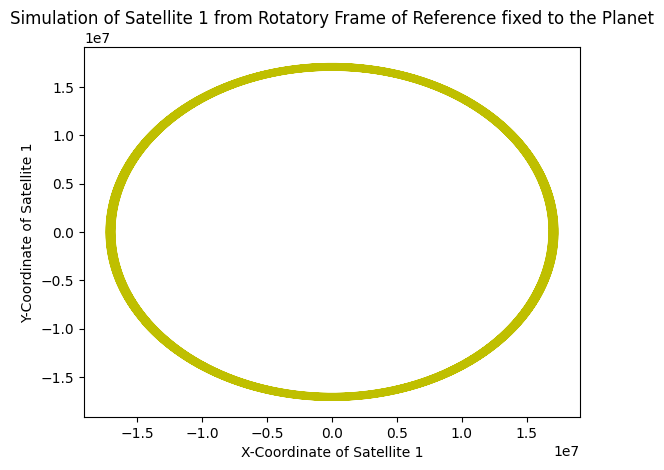

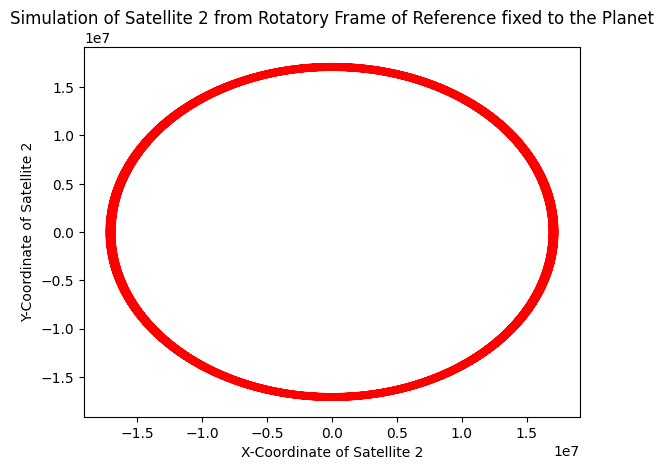

In [20]:
# Importing the libraries to be used in the code
import numpy as np
import matplotlib.pyplot as plt

G = 6.6743*(10**(-11))  # Universal Gravitational Constant
M = 5.972*(10**(24))  # Mass of the Earth

# Initial conditions
T = 6*3600
R = (T*((G*M)**0.5)/(2*np.pi))**(2/3)  # Radius for a period of 6 hours

# Masses of the satellites
m1 = 1729
m2 = 343

tmax = 365 * 2520  # Time duration taken as 2520 years

# Creating an array of coordinates to be updated and plotted later
x1 = np.zeros(tmax)
y1 = np.zeros(tmax)
x2 = np.zeros(tmax)
y2 = np.zeros(tmax)
r1 = np.zeros(tmax)
r2 = np.zeros(tmax)
r1[0] = R
r2[0] = R
 
# Initial velocities of the satellites
vx1 = 0
vy1 = 0
vx2 = 0
vy2 = 0

# Running a loop to update the Coordinate Arrays of Satellites
for t in range(0,tmax,1):
    
    # Updating the Coordinates of Satellites
    if t == 0:
        x1[t] = R
        y1[t] = 0
        x2[t] = -R
        y2[t] = 0
    else:
        x1[t] = x1[t-1] + vx1
        y1[t] = y1[t-1] + vy1
        x2[t] = x2[t-1] + vx2
        y2[t] = y2[t-1] + vy2
        
    # Taking Displacement vectors from Position vectors
    dx = x2[t] - x1[t]
    dy = y2[t] - y1[t]
    r12 = np.sqrt(dx**2 + dy**2)
    r1[t] = np.sqrt(x1[t]**2 + y1[t]**2)
    r2[t] = np.sqrt(x2[t]**2 + y2[t]**2)

    # Calculating acceleration in each direction for each satellite
    ax1 = ((G*m2*dx)/(r12**3))
    ay1 = ((G*m2*dy)/(r12**3))
    ax2 = - ((G*m2*dx)/(r12**3))
    ay2 = - ((G*m2*dy)/(r12**3))
    
    # Updating the Velocities of Satellites
    if t == 0:
        vx1 = vx1 + ax1 + np.sqrt(G*M/r1[t])*(y1[t]/r1[t])
        vy1 = vy1 + ay1 - np.sqrt(G*M/r1[t])*(x1[t]/r1[t])
        vx2 = vx2 + ax2 + np.sqrt(G*M/r2[t])*(y2[t]/r2[t])
        vy2 = vy2 + ay2 - np.sqrt(G*M/r2[t])*(x2[t]/r2[t])
    else:
        vx1 = vx1 + ax1 - np.sqrt(G*M/r1[t-1])*(y1[t-1]/r1[t-1]) + np.sqrt(G*M/r1[t])*(y1[t]/r1[t])
        vy1 = vy1 + ay1 + np.sqrt(G*M/r1[t-1])*(x1[t-1]/r1[t-1]) - np.sqrt(G*M/r1[t])*(x1[t]/r1[t])
        vx2 = vx2 + ax2 - np.sqrt(G*M/r2[t-1])*(y2[t-1]/r2[t-1]) + np.sqrt(G*M/r2[t])*(y2[t]/r2[t])
        vy2 = vy2 + ay2 + np.sqrt(G*M/r2[t-1])*(x2[t-1]/r2[t-1]) - np.sqrt(G*M/r2[t])*(x2[t]/r2[t])

# Plotting the Trajectory of Satellite 1
plt.plot(x1, y1, label = 'Satellite 1', color='y')
plt.xlabel('X-Coordinate of Satellite 1')
plt.ylabel('Y-Coordinate of Satellite 1')
plt.title('Simulation of Satellite 1 from Rotatory Frame of Reference fixed to the Planet')
plt.show()

# Plotting the Trajectory of Satellite 2
plt.plot(x2, y2, label = 'Satellite 2', color='r')
plt.xlabel('X-Coordinate of Satellite 2')
plt.ylabel('Y-Coordinate of Satellite 2')
plt.title('Simulation of Satellite 2 from Rotatory Frame of Reference fixed to the Planet')
plt.show()

# THE PLOTTING IS NOT DONE ON SAME GRAPH AS THE LINES OVERLAP AND 1 IS MADE INVISIBLE.